In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
#APPROACH
# - Perform some quick EDA 
# - Use KMeans clustering algo to create our segments 
# - Use summary statistics on the clusters 
# - Visualise 

In [3]:
df = pd.read_csv("Desktop/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

# Univariate Analysis: Analysis by one variable

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


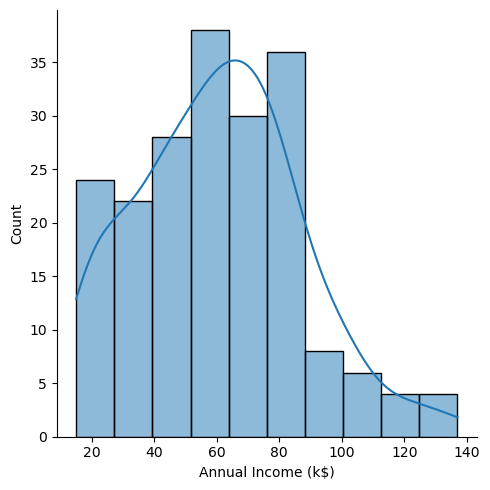

In [8]:
sns.displot(df['Annual Income (k$)'], kde=True);

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

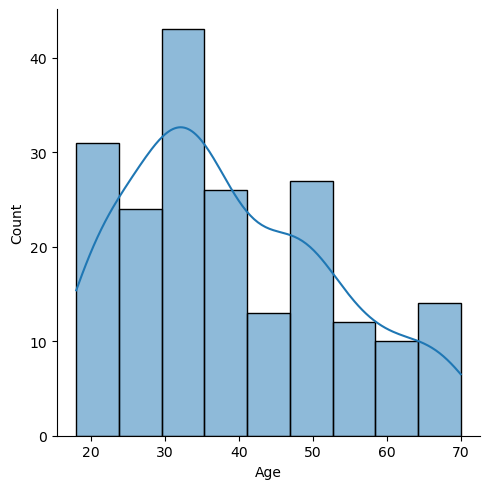

<Figure size 640x480 with 0 Axes>

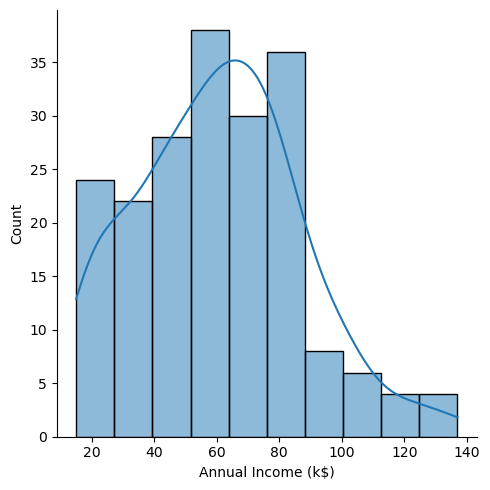

<Figure size 640x480 with 0 Axes>

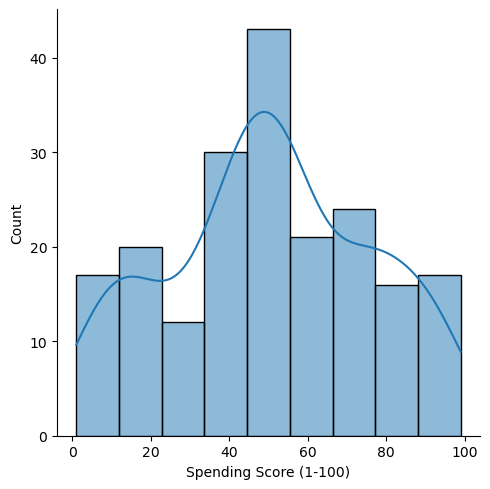

In [10]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure();
    sns.displot(df[i], kde=True);

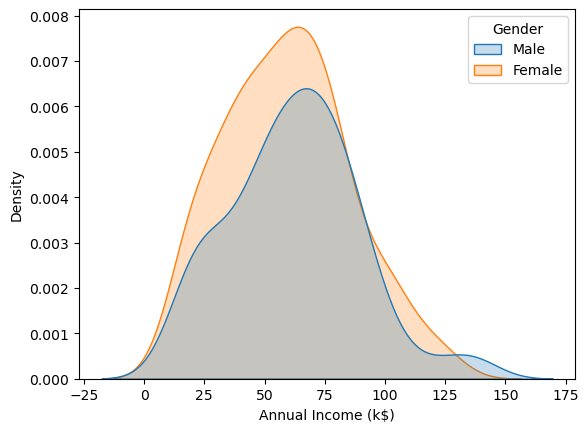

In [11]:
sns.kdeplot(x=df['Annual Income (k$)'],fill=True,hue=df['Gender']);

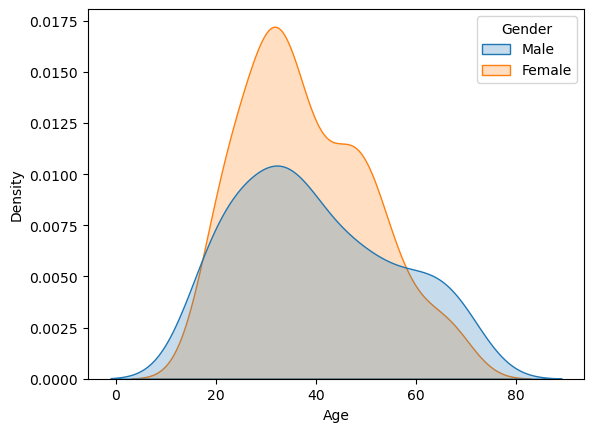

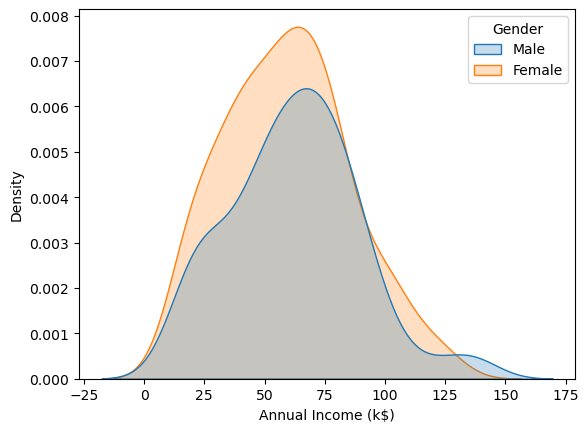

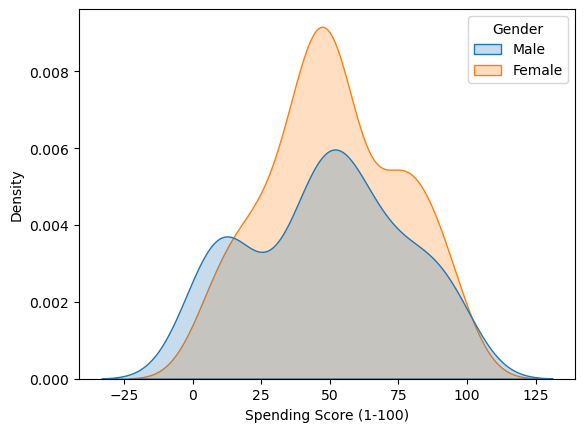

In [12]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(x=df[i],fill=True,hue=df['Gender']);

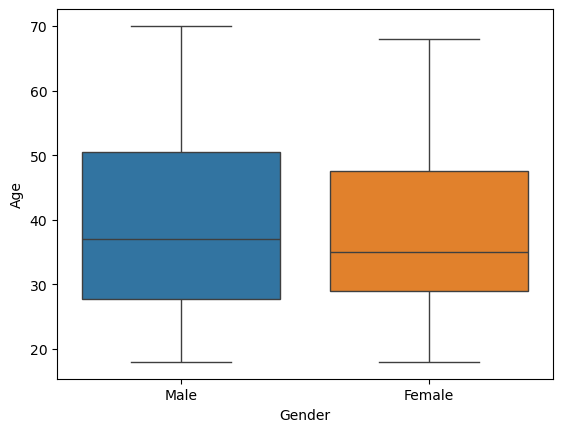

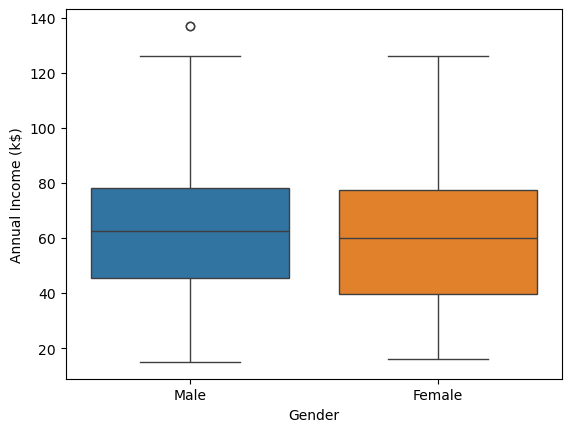

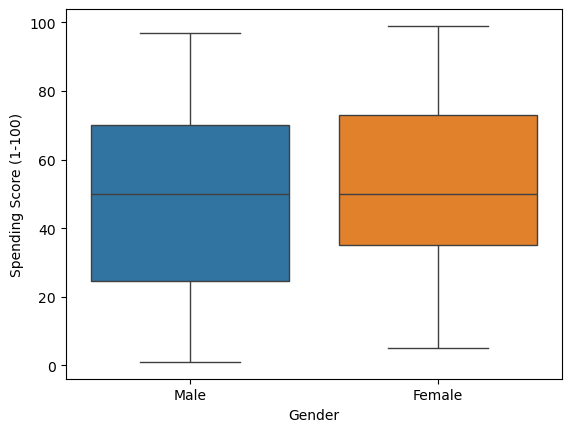

In [13]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure() 
    sns.boxplot(data=df,x='Gender',y=df[i],hue=df['Gender']);

In [14]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

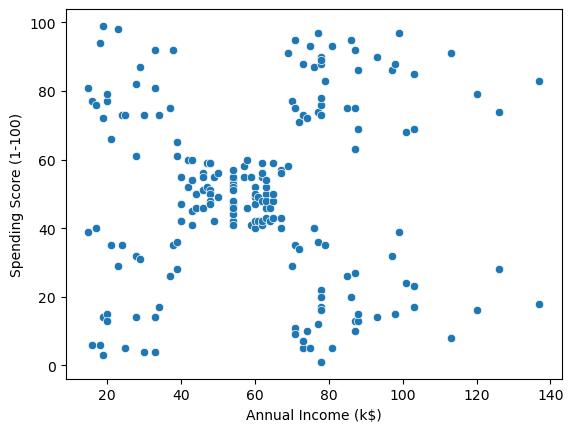

In [16]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

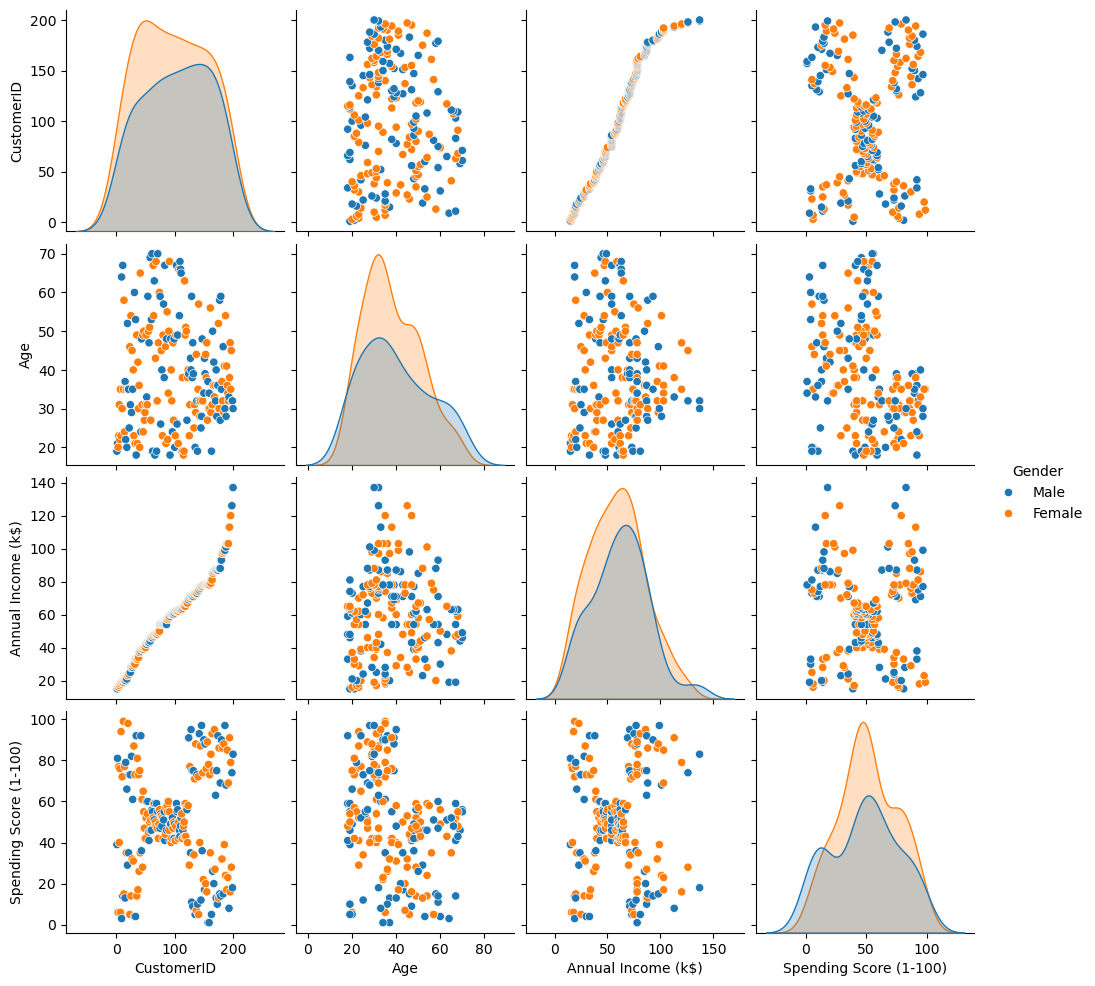

In [17]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [18]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [19]:
df.corr(numeric_only=True) 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

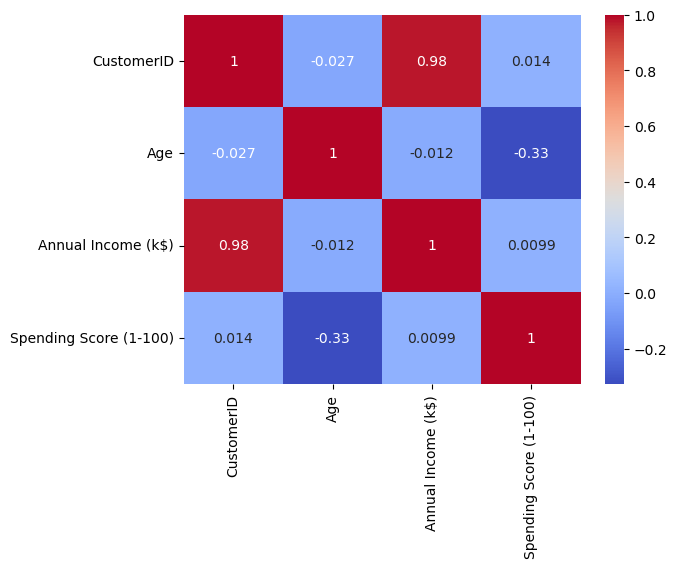

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate & Multivariate

In [22]:
clustering1 = KMeans(n_clusters =3) #Initiate, n_CLuster is not added till we do the elbow and see what works

In [23]:
clustering1.fit(df[['Annual Income (k$)']]) #FIt

KMeans(n_clusters=3)

In [24]:
clustering1.labels_ # see ehat clusters we have rn 3 so 0-2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [25]:
df['Income Cluster'] = clustering1.labels_ # adding clusters to table 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [26]:
df['Income Cluster'].value_counts()

Income Cluster
2    86
1    58
0    56
Name: count, dtype: int64

In [27]:
clustering1.inertia_ #success criteria ineritia gives a score. distance betweeen centroids so relatively low nuber 

25640.457784396836

In [28]:
#To see the inertia score for different clusters to see what is good - elbow method
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [29]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23528.152173913044,
 13844.222098218703,
 8684.330924608817,
 5503.407059314954,
 4055.31512605042,
 2822.4996947496948,
 2318.5187423687426,
 1800.2738095238094]

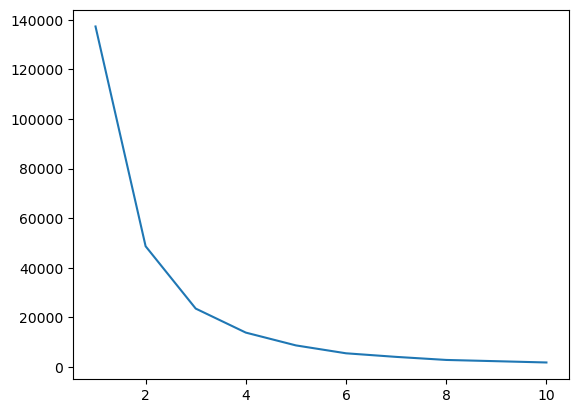

In [30]:
plt.plot(range(1,11),inertia_scores)

In [31]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,36.910714,92.142857,50.517857
1,37.120690,29.551724,49.689655
2,41.279070,60.906977,50.337209


# Bivariate Clustering

In [33]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,3


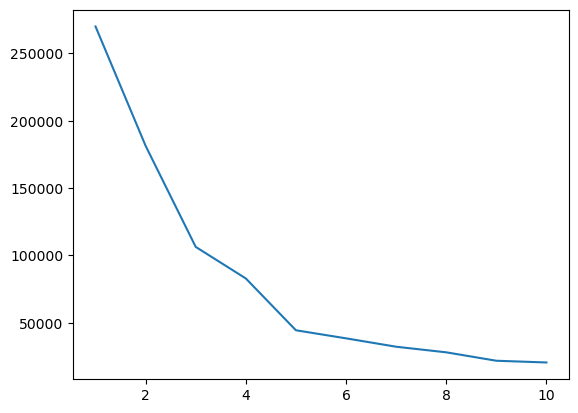

In [34]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [35]:
centers= pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

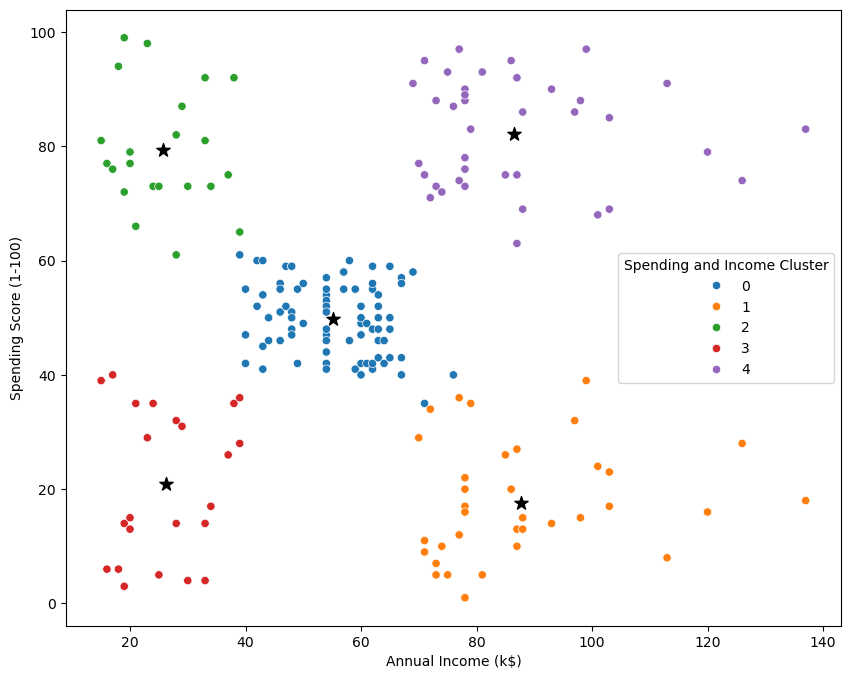

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)', y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [37]:
 df.groupby(['Spending and Income Cluster', 'Gender']).size().unstack(fill_value=0)

Gender,Female,Male
Spending and Income Cluster,,
0,47,33
1,17,19
2,13,9
3,14,9
4,21,18


In [38]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.587500,0.412500
1,0.472222,0.527778
2,0.590909,0.409091
3,0.608696,0.391304
4,0.538462,0.461538


In [39]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.937500,55.087500,49.712500
1,40.666667,87.750000,17.583333
2,25.272727,25.727273,79.363636
3,45.217391,26.304348,20.913043
4,32.692308,86.538462,82.128205


# Multivariate Clustering

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scale = StandardScaler() 

In [43]:
df.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,3


In [44]:
dff=pd.get_dummies(df,drop_first = True) 
dff =dff.astype(int)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,3,1
1,2,21,15,81,1,2,1
2,3,20,16,6,1,3,0
3,4,23,16,77,1,2,0
4,5,31,17,40,1,3,0


In [45]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [46]:
dff= dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [47]:
#scale so it all fits 
dff = scale.fit_transform(dff)

In [48]:
dff = pd.DataFrame(scale.fit_transform(dff))

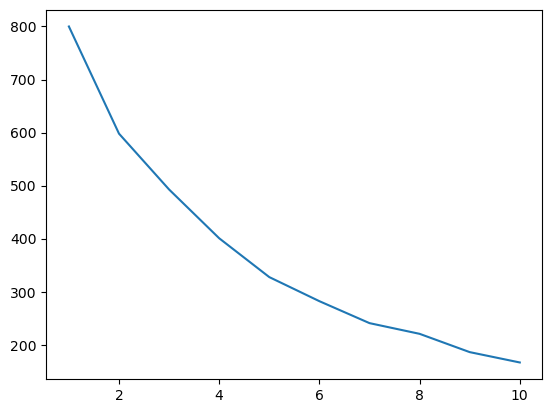

In [49]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [50]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,2
4,5,Female,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,4
196,197,Female,45,126,28,0,1
197,198,Male,32,126,74,0,4
198,199,Male,32,137,18,0,1


In [51]:
#Do pairplot and all the extra things we did for bivariate but 

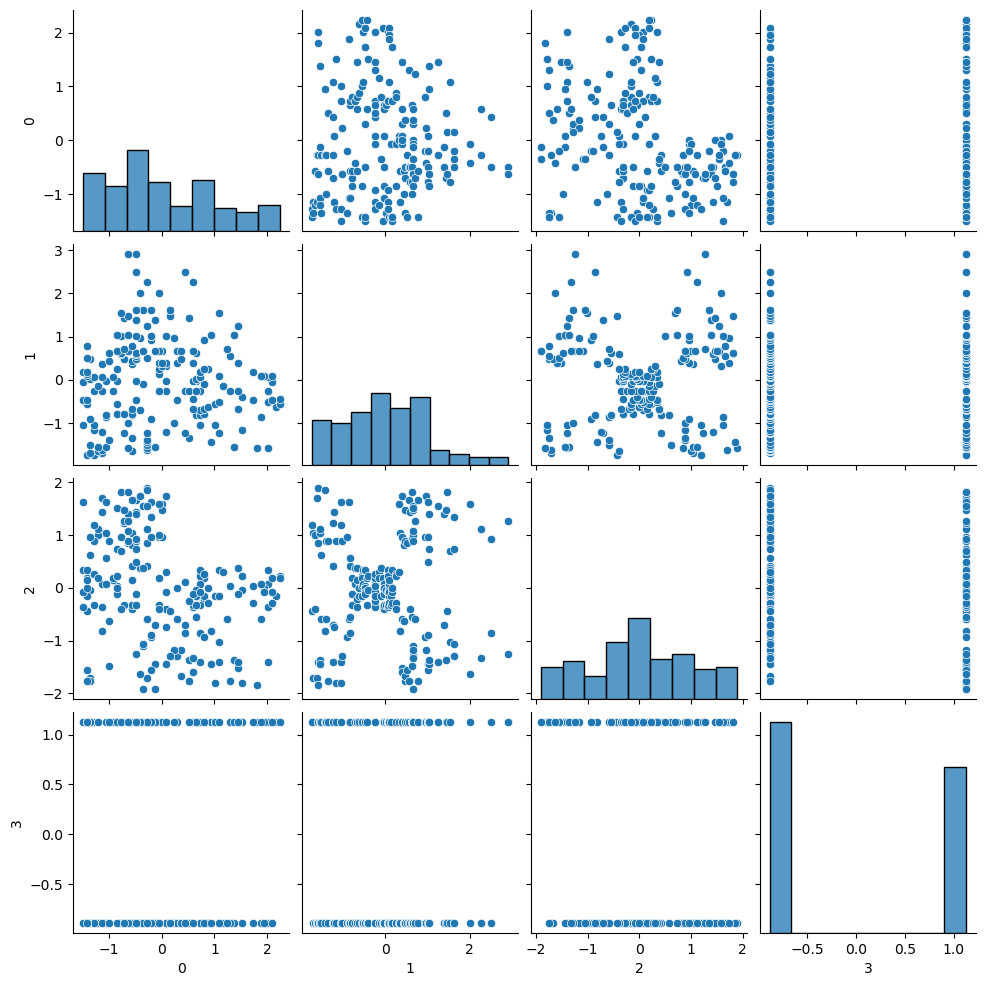

In [112]:
sns.pairplot(dff)